<IPython.core.display.Javascript object>


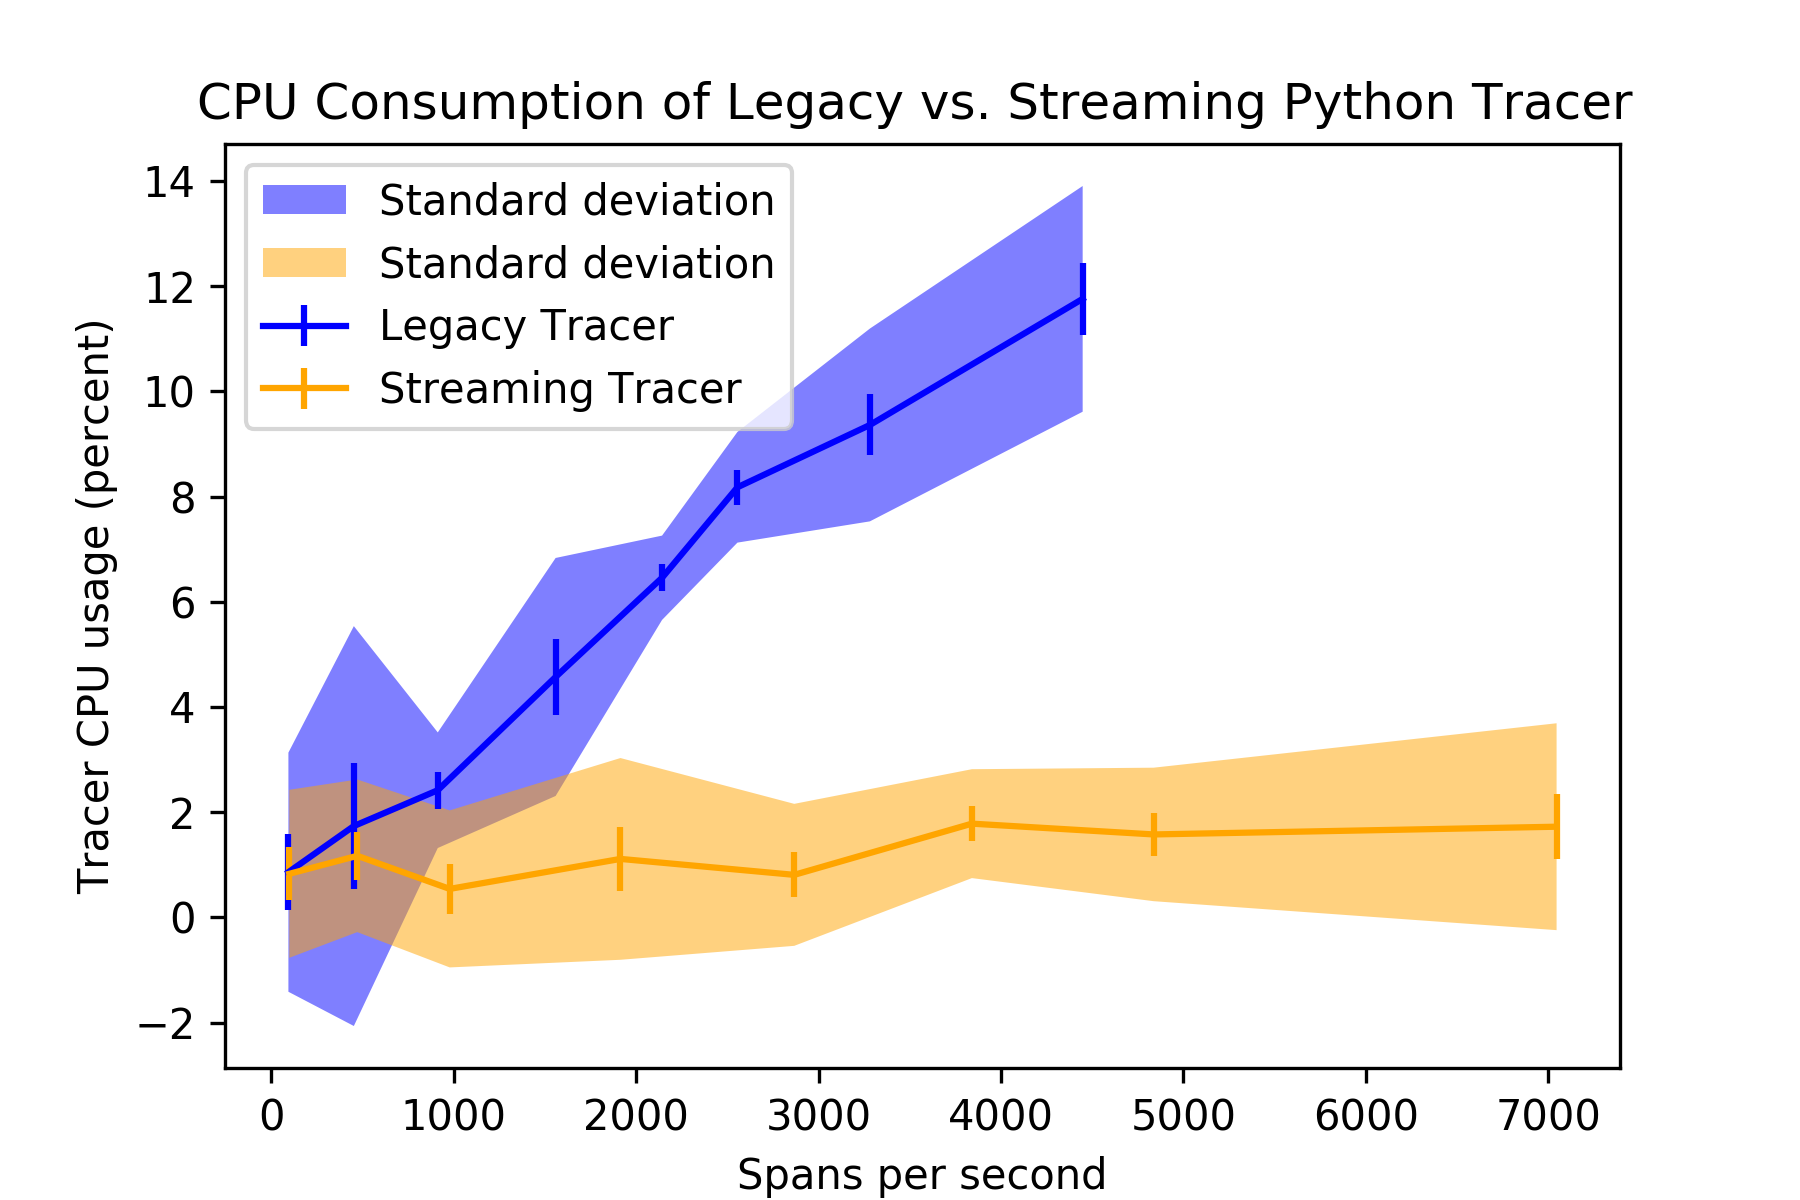

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

TRIALS = 10

def read_file(filename):
    """ Returns (spans per second list, cpu list, cpu standard deviation list) """
    
    cpu_list = []
    cpu_std_list = []
    sps_list = []
    
    
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file.readlines()):
            
            if line_number % TRIALS == 0:
                if line_number != 0:
                    cpu_list.append(np.mean(temp_cpu_list))
                    cpu_std_list.append(np.std(temp_cpu_list))
                    sps_list.append(np.mean(temp_sps_list))
                
                temp_sps_list = []
                temp_cpu_list = []
            
            cpu, sps = tuple( [float(i) for i in line.split(" ")] )
            temp_sps_list.append(sps)
            temp_cpu_list.append(cpu)
    
    return (sps_list, cpu_list, cpu_std_list)

            
sps_traced_python, cpu_traced_python, cpu_std_traced_python = read_file('cpu_comparison/python_traced.txt')
sps_untraced_python, cpu_untraced_python, cpu_std_untraced_python = read_file('cpu_comparison/python_untraced.txt')

sps_untraced_python_cpp, cpu_untraced_python_cpp, cpu_std_untraced_python_cpp = read_file('cpu_comparison/python_cpp_untraced.txt')
sps_traced_python_cpp, cpu_traced_python_cpp, cpu_std_traced_python_cpp = read_file('cpu_comparison/python_cpp_traced.txt')

# compute the difference between traced and untraced CPU usage
cpu_difference_python = [cpu_traced_python[i] - cpu_untraced_python[i]
                         for i in range(len(cpu_traced_python))]

cpu_std_difference_python = [(cpu_std_traced_python[i]**2 + cpu_std_traced_python[i]**2)**.5
                             for i in range(len(cpu_traced_python))]

cpu_difference_python_cpp = [cpu_traced_python_cpp[i] - cpu_untraced_python_cpp[i] 
                             for i in range(len(cpu_traced_python_cpp))]

cpu_std_difference_python_cpp = [(cpu_std_traced_python_cpp[i]**2 + cpu_std_traced_python_cpp[i]**2)**.5
                                 for i in range(len(cpu_traced_python_cpp))]

# python
fig, ax = plt.subplots(dpi=150, figsize=(6,4))
ax.errorbar(
    sps_traced_python,
    cpu_difference_python,
    yerr=[cpu_std / np.sqrt(TRIALS) for cpu_std in cpu_std_difference_python],
    color='blue',
    label='Legacy Tracer')

ax.fill_between(
    sps_traced_python,
    [cpu_difference_python[i] - cpu_std_difference_python[i] for i in range(len(cpu_difference_python))],
    [cpu_difference_python[i] + cpu_std_difference_python[i] for i in range(len(cpu_difference_python))],
    facecolor='blue',
    alpha=0.5,
    label='Standard deviation')

# python-cpp
ax.errorbar(
    sps_traced_python_cpp,
    cpu_difference_python_cpp,
    yerr=[cpu_std / np.sqrt(TRIALS) for cpu_std in cpu_std_difference_python_cpp],
    color='orange',
    label='Streaming Tracer')

ax.fill_between(
    sps_traced_python_cpp,
    [cpu_difference_python_cpp[i] - cpu_std_difference_python_cpp[i] for i in range(len(cpu_difference_python_cpp))],
    [cpu_difference_python_cpp[i] + cpu_std_difference_python_cpp[i] for i in range(len(cpu_difference_python_cpp))],
    facecolor='orange',
    alpha=0.5,
    label='Standard deviation')

ax.set(xlabel="Spans per second", ylabel="Tracer CPU usage (percent)")
ax.set_title(f'CPU Consumption of Legacy vs. Streaming Python Tracer ')
ax.legend()
fig.show()
                               